In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Pre-Processing

In [2]:
df = pd.read_csv('./Diabetes.csv')
df

,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
3,27,Female,60,0.206,26.3,82,Yes,Private,Never,0
4,35,Male,84,0.286,35.0,58,Yes,Private,Smoker,1
...,...,...,...,...,...,...,...,...,...,...
483,40,Female,88,0.403,34.5,72,Yes,Private,Smoker,1
484,58,Male,82,0.528,39.2,85,No,Public,Never,1
485,37,Female,84,0.696,24.5,128,No,Private,Never,0
486,29,Female,86,0.808,35.6,51,No,Private,Smoker,1


In [3]:
df.head()

,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
3,27,Female,60,0.206,26.3,82,Yes,Private,Never,0
4,35,Male,84,0.286,35.0,58,Yes,Private,Smoker,1


In [4]:
print(df.shape)

(488, 10)


In [5]:
df.describe()

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Diabetes
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,33.752049,72.795082,0.483633,30.194672,84.260246,0.506148
std,11.327584,12.889477,0.321207,6.669993,25.222865,0.500475
min,21.000000,30.000000,0.078000,15.300000,19.000000,0.000000
25%,24.000000,64.000000,0.254000,24.900000,66.000000,0.000000
50%,30.500000,72.000000,0.407000,30.500000,80.000000,1.000000
75%,41.000000,80.000000,0.637250,34.625000,99.000000,1.000000
max,81.000000,114.000000,2.420000,57.100000,177.000000,1.000000


In [6]:
# Check for null values
print(df.isnull().sum())

Age                 0
Sex                 0
BloodPressure       0
GeneticRisk         0
BMI                 0
PhysicalActivity    0
Married             0
Work                0
Smoker              0
Diabetes            0
dtype: int64


In [ ]:
# Replace null values with appropriate values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['GeneticRisk'].fillna(df['GeneticRisk'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['PhysicalActivity'].fillna(df['PhysicalActivity'].mean(), inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Work'].fillna(df['Work'].mode()[0], inplace=True)
df['Smoker'].fillna(df['Smoker'].mode()[0], inplace=True)
df['Diabetes'].fillna(df['Diabetes'].mode()[0], inplace=True)

In [11]:
# Verify no null values remain
print(df.isnull().sum())

Age                 0
Sex                 0
BloodPressure       0
GeneticRisk         0
BMI                 0
PhysicalActivity    0
Married             0
Work                0
Smoker              0
Diabetes            0
dtype: int64


# Relations Between Columns

### PhysicalActivity VS. Work

Text(0.5, 1.0, 'PhysicalActivity VS. Work')

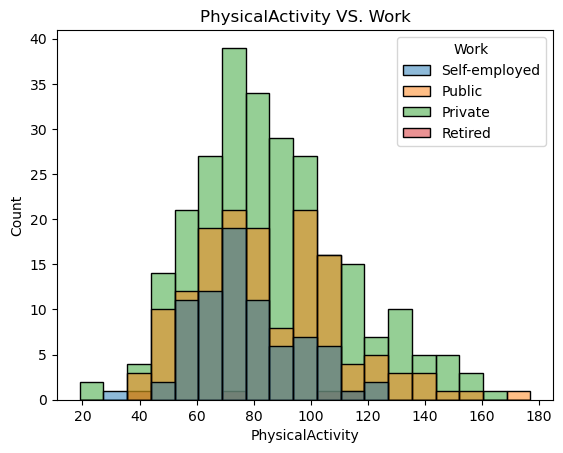

In [15]:
sns.histplot(df,x='PhysicalActivity',hue='Work')
plt.title('PhysicalActivity VS. Work')

<Axes: xlabel='PhysicalActivity'>

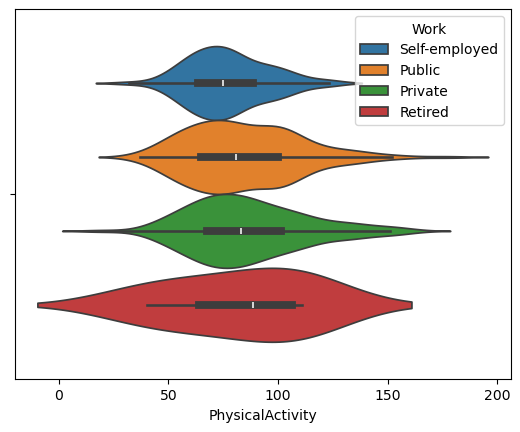

In [8]:
sns.violinplot(df,x='PhysicalActivity',hue='Work')

### PhysicalActivity VS. Diabetes

Text(0.5, 1.0, 'PhysicalActivity VS. Diabetes')

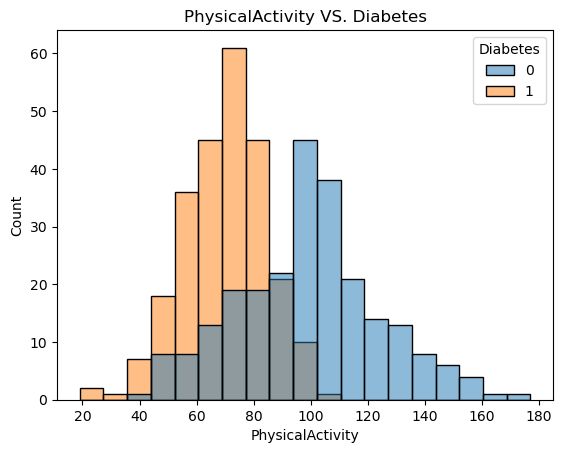

In [16]:
sns.histplot(df,x='PhysicalActivity',hue='Diabetes')
plt.title('PhysicalActivity VS. Diabetes')

<Axes: xlabel='PhysicalActivity'>

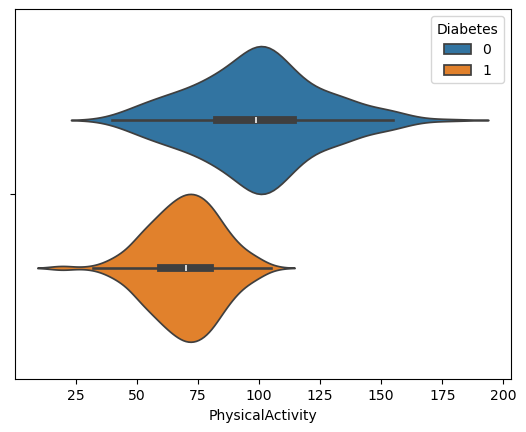

In [7]:
sns.violinplot(df,x='PhysicalActivity',hue='Diabetes')

### BMI VS. Married

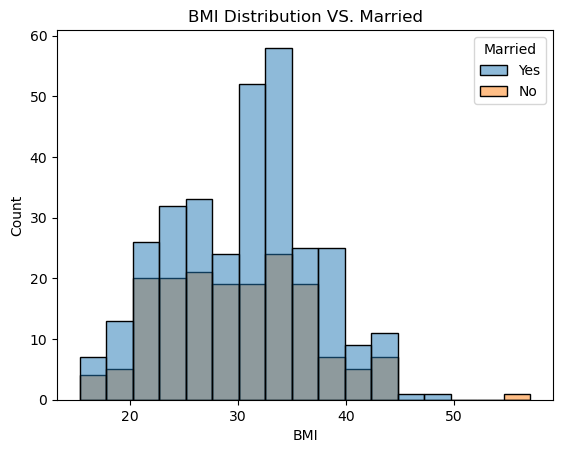

In [14]:
sns.histplot(df, x='BMI', hue='Married')
plt.title('BMI Distribution VS. Married')
plt.show()

<Axes: xlabel='BMI'>

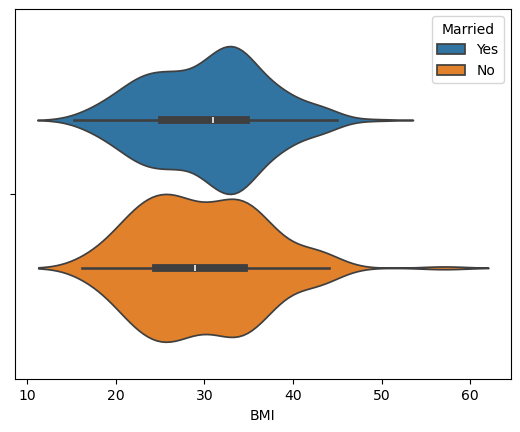

In [17]:
sns.violinplot(df, x='BMI', hue='Married')

### Smoking Situations for Men & Women

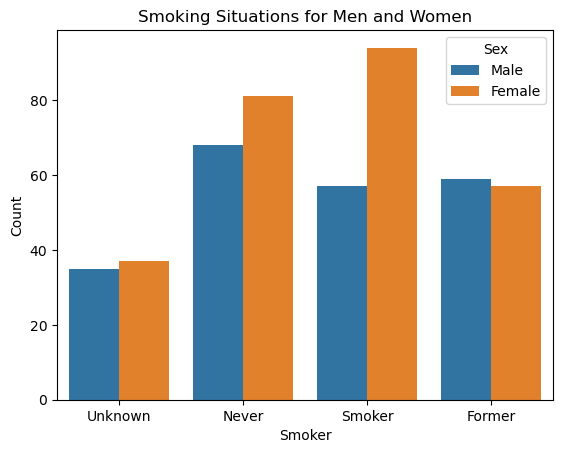

In [18]:
sns.countplot(data=df, x='Smoker', hue='Sex')
plt.title('Smoking Situations for Men and Women')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Standardization 

Yes, this dataset likely needs standardization as we plan to apply machine learning algorithms that are sensitive to the scale of the data, such as Principal Component Analysis (PCA).

Standardization ensures that all features contribute equally to the model by scaling them to have a mean of 0 and a standard deviation of 1.

We Need Standardization because of:
- **Different Scales**: Features like Age, BMI, and BloodPressure might have different ranges, which can bias the results of algorithms that rely on distance metrics.

- **PCA**: PCA is sensitive to the magnitude of the features because it maximizes variance. Without standardization, features with larger scales will dominate the principal components.

Only numerical columns are standardized, as categorical columns like Sex, Married, and Smoker do not require scaling.

In [ ]:
# Select numerical columns for standardization
numerical_columns = ['Age', 'BloodPressure', 'GeneticRisk', 'BMI', 'PhysicalActivity']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_scaled = scaler.fit_transform(df[numerical_columns])

In [7]:
df_scaled

array([[ 0.02191158,  0.87019947,  0.4218644 , -0.82463519,  0.34685681],
       [-0.77342442,  0.09357668,  0.33460369, -1.1548091 ,  0.70404207],
       [ 1.43584224,  0.55955035, -0.95249176,  0.64613953,  0.54529307],
       ...,
       [ 0.28702358,  0.87019947,  0.66183135, -0.854651  ,  1.7359106 ],
       [-0.41994175,  1.02552403,  1.01087419,  0.81122648, -1.32000772],
       [ 0.11028225,  1.33617314, -0.52865404,  0.94629763, -0.3675137 ]])

In [8]:
pd.DataFrame(df_scaled, columns = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity'])

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
0,0.021912,0.870199,0.421864,-0.824635,0.346857
1,-0.773424,0.093577,0.334604,-1.154809,0.704042
2,1.435842,0.559550,-0.952492,0.646140,0.545293
3,-0.596683,-0.993695,-0.865231,-0.584509,-0.089703
4,0.110282,0.870199,-0.615915,0.721179,-1.042197
...,...,...,...,...,...
483,0.552136,1.180849,-0.251290,0.646140,-0.486575
484,2.142808,0.714875,0.138267,1.351511,0.029359
485,0.287024,0.870199,0.661831,-0.854651,1.735911
486,-0.419942,1.025524,1.010874,0.811226,-1.320008


In [9]:
pd.DataFrame(df_scaled, columns = ['Age', 'BloodPressure','GeneticRisk','BMI','PhysicalActivity']).describe()

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
count,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02
mean,2.548053e-16,-5.423712e-16,9.464196e-17,-9.100189e-17,-2.766457e-16
std,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00
min,-1.126907e+00,-3.323564e+00,-1.264137e+00,-2.235378e+00,-2.590000e+00
25%,-8.617951e-01,-6.830461e-01,-7.156413e-01,-7.946194e-01,-7.246990e-01
50%,-2.873858e-01,-6.174788e-02,-2.388238e-01,4.582332e-02,-1.690774e-01
75%,6.405062e-01,5.595504e-01,4.787397e-01,6.648994e-01,5.849803e-01
max,4.175333e+00,3.200068e+00,6.034598e+00,4.037926e+00,3.680586e+00


# Apply the PCA

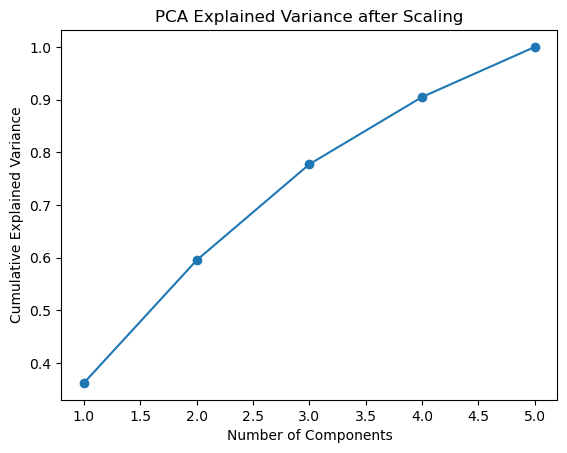

In [ ]:
# Apply PCA
pca = PCA(n_components=5)
pca.fit(df_scaled)

# Plot explained variance
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance after Scaling')
plt.show()


In [11]:
# Cov Matrix
cov_matrix = np.cov(df_scaled, rowvar=False)  

# EigenValue & Vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort EigenValue & Vector
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

k = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {k}")

Number of components to retain 90% variance: 4


In [12]:
top_k_eigenvectors = sorted_eigenvectors[:, :k]
reduced_data = np.dot(df_scaled, top_k_eigenvectors)

print("\nReduced data shape:", reduced_data.shape)
print("\nReduced data (first 5 samples):")
print(reduced_data[:5])

print("\nExplained variance ratio:", explained_variance_ratio[:k])
print("\nCumulative explained variance:", cumulative_explained_variance[:k])


Reduced data shape: (488, 4)

Reduced data (first 5 samples):
[[-0.16651806  0.73713042  0.83058353 -0.09580268]
 [-1.21998644  0.13657767  0.80726908 -0.15051314]
 [ 0.69777077  1.44213811 -0.52126768  0.09910921]
 [-1.18338587 -0.39186844 -0.91013523  0.21652775]
 [ 1.15092087  0.22508229 -0.9037284  -0.64829921]]

Explained variance ratio: [0.36247018 0.23283915 0.18214908 0.12753542]

Cumulative explained variance: [0.36247018 0.59530933 0.77745841 0.90499382]


So, We use the first 4 principal components as it retains 90% variance.

In [14]:
PCA_obj = PCA(n_components = 4)
PCA_obj

PCA(n_components=4)

# Display Results after applying the PCA

In [21]:
principal_components = PCA_obj.fit_transform(df_scaled)
principal_components

array([[-0.16651806,  0.73713042,  0.83058353, -0.09580268],
       [-1.21998644,  0.13657767,  0.80726908, -0.15051314],
       [ 0.69777077,  1.44213811, -0.52126768,  0.09910921],
       ...,
       [-0.69151593,  1.2785098 ,  1.69313988, -0.09615182],
       [ 1.60935478, -0.73951173,  0.36011807, -0.73611603],
       [ 1.14920753,  0.63515778, -0.42704211, -1.09588429]])

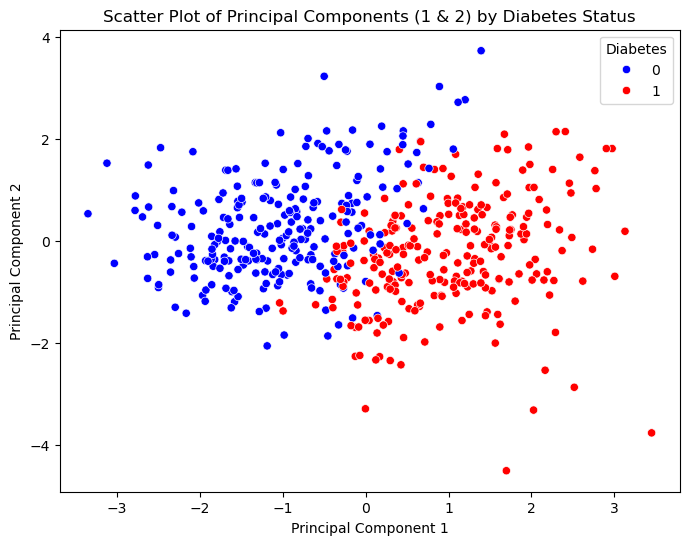

In [ ]:
# Convert the transformed data to a DataFrame and add the Diabetes label
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])
principal_df['Diabetes'] = df['Diabetes']

# Define a custom color palette: 0 -> blue, 1 -> red
custom_palette = {0: 'blue', 1: 'red'}

# Plot the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='Principal Component 1', y='Principal Component 2', hue='Diabetes', palette=custom_palette)
plt.title('Scatter Plot of Principal Components (1 & 2) by Diabetes Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes')
plt.show()